<a href="https://colab.research.google.com/github/yuktimittal/Emotion-Classification-using-EEG-Brain-waves/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from collections import defaultdict

models = []
models.append(('SVC-rbf', SVC(kernel = 'rbf', random_state = 5)))
models.append(('SVC-poly', SVC(kernel = 'poly', random_state = 10)))
models.append(('SVC-sigmoid', SVC(kernel = 'sigmoid',  random_state = 10)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=30)))
models.append(('NaiveBayes', GaussianNB()))
models.append(('NN', MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=0)))

scoring = 'accuracy'

results_1_0 = defaultdict(list)

In [ ]:
file_x = 'data/32/features_raw.dat'
X = np.genfromtxt(file_x, delimiter=' ')
thresh_values=[3.5,4,4.5,5,5.5,6,6.5,7]
for thresh_val in thresh_values:
      print('thresh_value:'+str(thresh_val))
      # Get Data
      
      file_y = "datalabel_class_0_{}.dat".format(str(thresh_val))
      y = np.genfromtxt(file_y, delimiter=' ')
      
      # Split the data into training/testing sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
      
      # Feature Scaling
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      from sklearn.decomposition import PCA
      pca = PCA(n_components=2)
      X_train_pca = pca.fit_transform(X_train)
      X_test_pca = pca.fit_transform(X_test)
                        
      print('Model | Mean of CV | Std. Dev. of CV | Time')
      for i in range(len(models)):
                name, model=models[i]
                start_time = time.time()
                kfold = model_selection.KFold(n_splits=5, shuffle=True,random_state=0)
                cv_results = model_selection.cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring=scoring)
                t = (time.time() - start_time)
                results_1_0[i].append(cv_results.mean())
                msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
                print(msg) 

thresh_value:3.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.771117 (0.050231) 0.136674 s
SVC-poly: 0.770012 (0.050140) 2.510857 s
SVC-sigmoid: 0.708684 (0.042737) 0.085897 s
KNN: 0.771130 (0.047265) 0.038105 s
NaiveBayes: 0.766660 (0.052701) 0.007211 s
NN: 0.227747 (0.046501) 0.058635 s
thresh_value:4
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.714215 (0.050577) 0.141576 s
SVC-poly: 0.716462 (0.046268) 1.102238 s
SVC-sigmoid: 0.650670 (0.041433) 0.096272 s
KNN: 0.717579 (0.044780) 0.038944 s
NaiveBayes: 0.716462 (0.051381) 0.007775 s
NN: 0.288001 (0.045479) 0.063452 s
thresh_value:4.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.630528 (0.046350) 0.147305 s
SVC-poly: 0.627169 (0.048644) 6.382924 s
SVC-sigmoid: 0.580341 (0.022166) 0.101978 s
KNN: 0.585916 (0.037347) 0.037155 s
NaiveBayes: 0.632775 (0.044184) 0.007197 s
NN: 0.369472 (0.049476) 0.061888 s
thresh_value:5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.557995 (0.036029) 0.157197 s
SVC

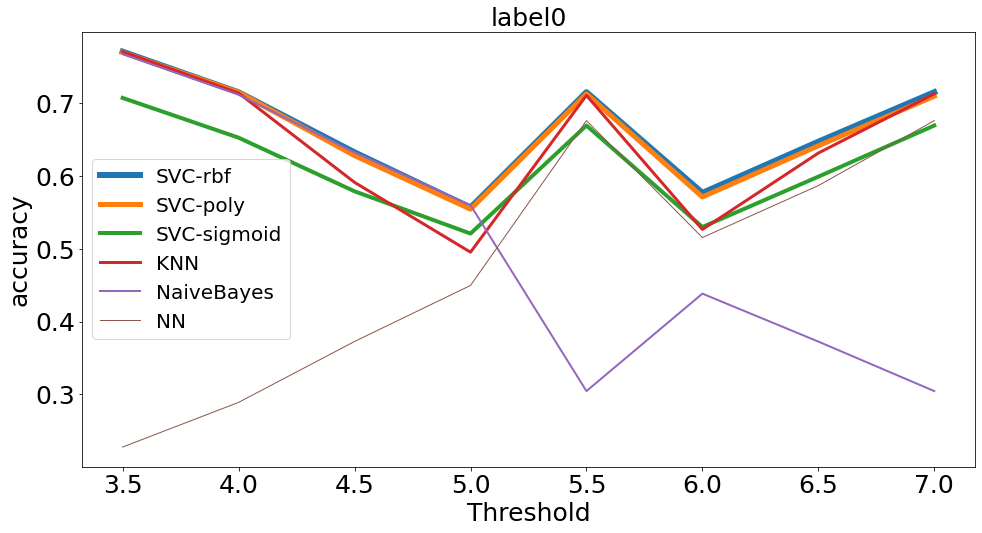

In [ ]:
plt.figure(figsize=(16,8))
for i in range(6):
  plt.plot(thresh_values, results_1_0[i],label=models[i][0],linewidth=6-i)
plt.xlabel('Threshold', fontsize=25)
plt.ylabel('accuracy', fontsize=25)
plt.title('label0', fontsize=25)
plt.legend(fontsize=16)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [ ]:
results_1_1 = defaultdict(list)
results_1_2 = defaultdict(list)
results_1_3 = defaultdict(list)

In [ ]:
file_x = 'data/32/features_raw.dat'
X = np.genfromtxt(file_x, delimiter=' ')
thresh_values=[3.5,4,4.5,5,5.5,6,6.5,7]
for thresh_val in thresh_values:
      print('thresh_value:'+str(thresh_val))
      # Get Data
      
      file_y = "data/label_class_1_{}.dat".format(str(thresh_val))
      y = np.genfromtxt(file_y, delimiter=' ')
      
      # Split the data into training/testing sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
      
      # Feature Scaling
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      from sklearn.decomposition import PCA
      pca = PCA(n_components=2)
      X_train_pca = pca.fit_transform(X_train)
      X_test_pca = pca.fit_transform(X_test)
                        
      print('Model | Mean of CV | Std. Dev. of CV | Time')
      for i in range(len(models)):
                name, model=models[i]
                start_time = time.time()
                kfold = model_selection.KFold(n_splits=5, shuffle=True,random_state=0)
                cv_results = model_selection.cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring=scoring)
                t = (time.time() - start_time)
                results_1_1[i].append(cv_results.mean())
                msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
                print(msg) 

thresh_value:3.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.762266 (0.020899) 0.128740 s
SVC-poly: 0.761148 (0.017606) 2.052126 s
SVC-sigmoid: 0.697486 (0.037513) 0.085994 s
KNN: 0.762266 (0.020899) 0.038834 s
NaiveBayes: 0.471235 (0.249852) 0.007070 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN: 0.342241 (0.176721) 5.980489 s
thresh_value:4
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.699777 (0.019791) 0.145141 s
SVC-poly: 0.699777 (0.018146) 1.178339 s
SVC-sigmoid: 0.632787 (0.024671) 0.095363 s
KNN: 0.694202 (0.025000) 0.040518 s
NaiveBayes: 0.407467 (0.160058) 0.007049 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN: 0.382483 (0.148338) 6.355633 s
thresh_value:4.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.640633 (0.016598) 0.156397 s
SVC-poly: 0.638399 (0.010608) 0.657296 s
SVC-sigmoid: 0.555798 (0.011687) 0.101435 s
KNN: 0.604935 (0.015690) 0.038964 s
NaiveBayes: 0.589236 (0.099274) 0.007246 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN: 0.440745 (0.084359) 11.830779 s
thresh_value:5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.577014 (0.023691) 0.165082 s
SVC-poly: 0.575891 (0.016599) 4.384350 s
SVC-sigmoid: 0.492179 (0.024120) 0.104788 s
KNN: 0.516704 (0.032034) 0.039667 s
NaiveBayes: 0.555785 (0.047376) 0.007326 s
NN: 0.438547 (0.038381) 1.839392 s
thresh_value:5.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.756667 (0.031920) 0.121148 s
SVC-poly: 0.755556 (0.033939) 0.473603 s
SVC-sigmoid: 0.697529 (0.028501) 0.063375 s
KNN: 0.756667 (0.031920) 0.040536 s
NaiveBayes: 0.754426 (0.037105) 0.007834 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN: 0.679696 (0.042417) 20.642252 s
thresh_value:6
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.578094 (0.033235) 0.148854 s
SVC-poly: 0.575866 (0.023613) 2.307436 s
SVC-sigmoid: 0.535686 (0.015123) 0.089843 s
KNN: 0.553526 (0.027574) 0.037368 s
NaiveBayes: 0.534519 (0.077857) 0.007127 s
NN: 0.569193 (0.023319) 0.067573 s
thresh_value:6.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.700857 (0.041223) 0.122530 s
SVC-poly: 0.699745 (0.040399) 2.048943 s
SVC-sigmoid: 0.651788 (0.037131) 0.072681 s
KNN: 0.696387 (0.041255) 0.038796 s
NaiveBayes: 0.527672 (0.196451) 0.007408 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN: 0.680745 (0.062198) 5.757091 s
thresh_value:7
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.756667 (0.031920) 0.113758 s
SVC-poly: 0.755556 (0.031057) 0.485773 s
SVC-sigmoid: 0.694190 (0.029067) 0.067705 s
KNN: 0.756667 (0.031920) 0.038568 s
NaiveBayes: 0.754432 (0.034637) 0.007133 s
NN: 0.732086 (0.054390) 6.114668 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


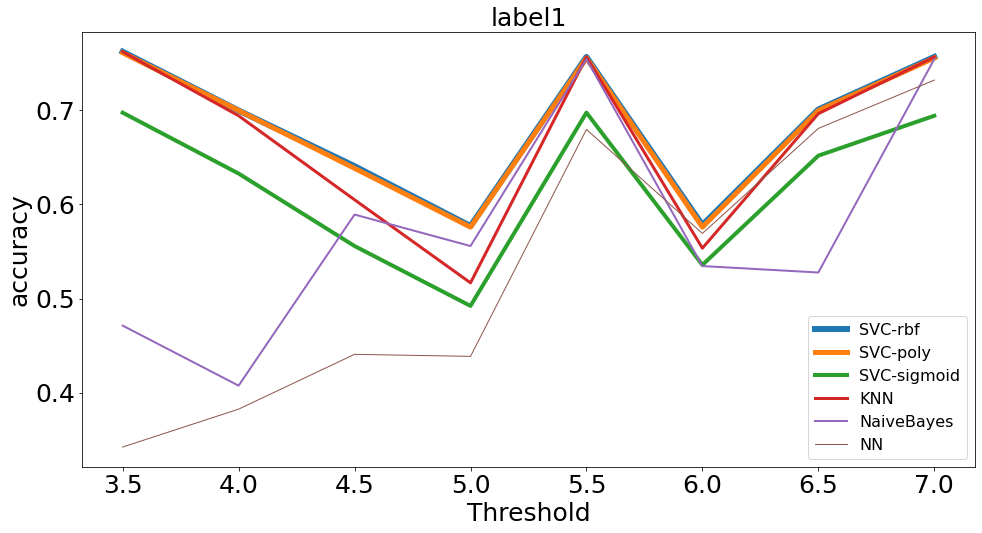

In [ ]:
plt.figure(figsize=(16,8))
for i in range(6):
  plt.plot(thresh_values, results_1_1[i],label=models[i][0],linewidth=6-i)
plt.xlabel('Threshold', fontsize=25)
plt.ylabel('accuracy', fontsize=25)
plt.title('label1', fontsize=25)
plt.legend(fontsize=16)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [ ]:
file_x = 'data/32/features_raw.dat'
X = np.genfromtxt(file_x, delimiter=' ')
thresh_values=[3.5,4,4.5,5,5.5,6,6.5,7]
for thresh_val in thresh_values:
      print('thresh_value:'+str(thresh_val))
      # Get Data
      
      file_y = "data/label_class_2_{}.dat".format(str(thresh_val))
      y = np.genfromtxt(file_y, delimiter=' ')
      
      # Split the data into training/testing sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
      
      # Feature Scaling
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      from sklearn.decomposition import PCA
      pca = PCA(n_components=2)
      X_train_pca = pca.fit_transform(X_train)
      X_test_pca = pca.fit_transform(X_test)
                        
      print('Model | Mean of CV | Std. Dev. of CV | Time')
      for i in range(len(models)):
                name, model=models[i]
                start_time = time.time()
                kfold = model_selection.KFold(n_splits=5, shuffle=True,random_state=0)
                cv_results = model_selection.cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring=scoring)
                t = (time.time() - start_time)
                results_1_2[i].append(cv_results.mean())
                msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
                print(msg) 

thresh_value:3.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.778994 (0.014711) 0.124746 s
SVC-poly: 0.774525 (0.013909) 3.580270 s
SVC-sigmoid: 0.724320 (0.014569) 0.083384 s
KNN: 0.777883 (0.013217) 0.039813 s
NaiveBayes: 0.776760 (0.014052) 0.007532 s
NN: 0.231043 (0.010681) 0.063317 s
thresh_value:4
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.720931 (0.027114) 0.137607 s
SVC-poly: 0.718696 (0.027501) 7.521306 s
SVC-sigmoid: 0.657331 (0.026041) 0.090686 s
KNN: 0.718703 (0.026058) 0.038322 s
NaiveBayes: 0.373991 (0.156893) 0.007131 s
NN: 0.290230 (0.026671) 0.066812 s
thresh_value:4.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.655059 (0.035808) 0.159984 s
SVC-poly: 0.653942 (0.039718) 11.123591 s
SVC-sigmoid: 0.588125 (0.023960) 0.100861 s
KNN: 0.633861 (0.031180) 0.039503 s
NaiveBayes: 0.504668 (0.137348) 0.007527 s
NN: 0.349410 (0.038076) 0.072585 s
thresh_value:5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.598150 (0.033611) 0.156817 s
SV

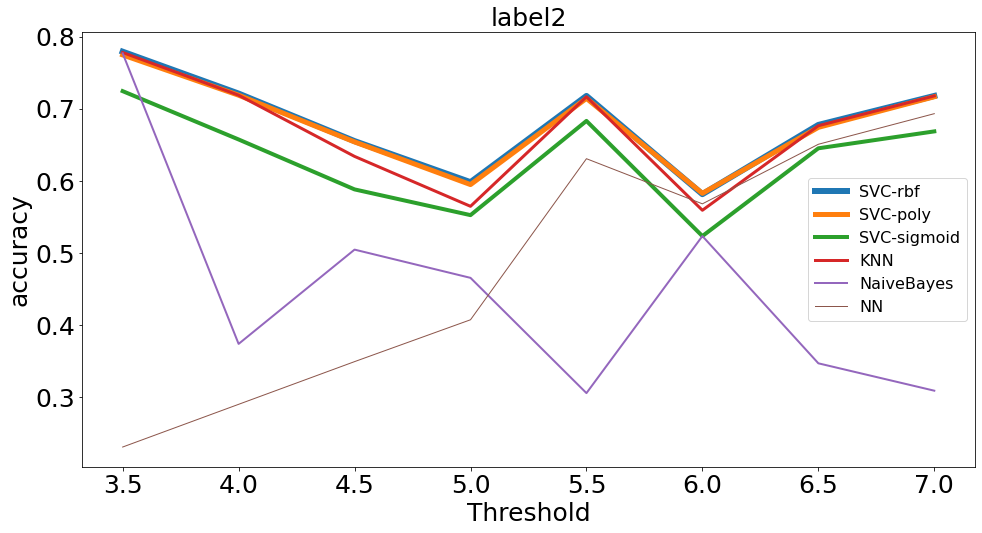

In [ ]:
plt.figure(figsize=(16,8))
for i in range(6):
  plt.plot(thresh_values, results_1_2[i],label=models[i][0],linewidth=6-i)
plt.xlabel('Threshold', fontsize=25)
plt.ylabel('accuracy', fontsize=25)
plt.title('label2', fontsize=25)
plt.legend(fontsize=16)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [ ]:
file_x = 'data/32/features_raw.dat'
X = np.genfromtxt(file_x, delimiter=' ')
thresh_values=[3.5,4,4.5,5,5.5,6,6.5,7]
for thresh_val in thresh_values:
      print('thresh_value:'+str(thresh_val))
      # Get Data
      
      file_y = "data/label_class_3_{}.dat".format(str(thresh_val))
      y = np.genfromtxt(file_y, delimiter=' ')
      
      # Split the data into training/testing sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
      
      # Feature Scaling
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      from sklearn.decomposition import PCA
      pca = PCA(n_components=2)
      X_train_pca = pca.fit_transform(X_train)
      X_test_pca = pca.fit_transform(X_test)
                        
      print('Model | Mean of CV | Std. Dev. of CV | Time')
      for i in range(len(models)):
                name, model=models[i]
                start_time = time.time()
                kfold = model_selection.KFold(n_splits=5, shuffle=True,random_state=0)
                cv_results = model_selection.cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring=scoring)
                t = (time.time() - start_time)
                results_1_3[i].append(cv_results.mean())
                msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
                print(msg) 

thresh_value:3.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.781217 (0.018828) 0.128610 s
SVC-poly: 0.782328 (0.020637) 0.244647 s
SVC-sigmoid: 0.709801 (0.028232) 0.078166 s
KNN: 0.777883 (0.014130) 0.038400 s
NaiveBayes: 0.774519 (0.021101) 0.007289 s
NN: 0.226592 (0.017502) 0.059345 s
thresh_value:4
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.744364 (0.027191) 0.127899 s
SVC-poly: 0.747709 (0.029191) 0.261558 s
SVC-sigmoid: 0.669615 (0.027758) 0.085011 s
KNN: 0.739913 (0.019700) 0.037608 s
NaiveBayes: 0.738790 (0.029373) 0.006976 s
NN: 0.256754 (0.027338) 0.057336 s
thresh_value:4.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.704171 (0.031521) 0.151670 s
SVC-poly: 0.705282 (0.034094) 1.154342 s
SVC-sigmoid: 0.632787 (0.028868) 0.090896 s
KNN: 0.694153 (0.023501) 0.037057 s
NaiveBayes: 0.699714 (0.029311) 0.007114 s
NN: 0.300286 (0.028665) 0.056335 s
thresh_value:5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.669565 (0.035087) 0.153104 s
SVC

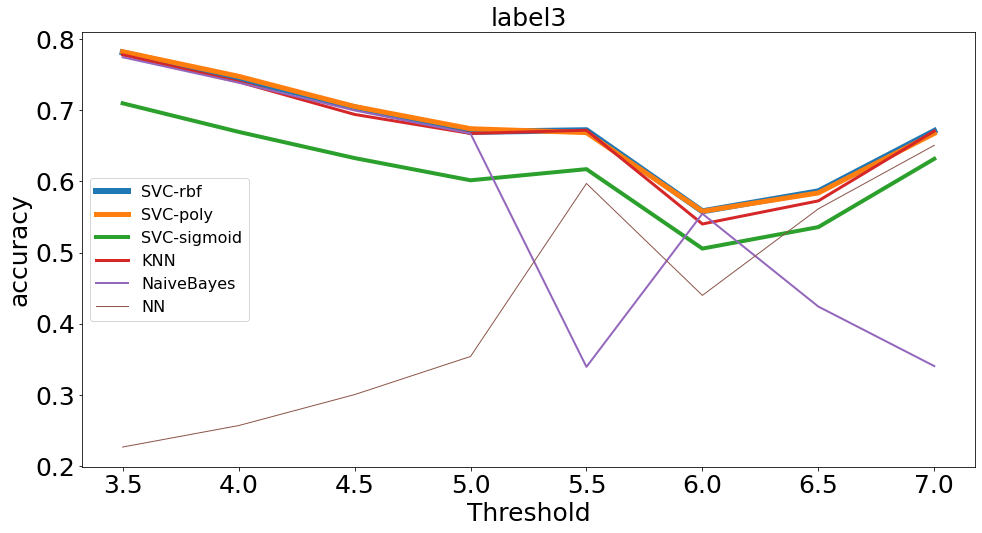

In [ ]:
plt.figure(figsize=(16,8))
for i in range(6):
  plt.plot(thresh_values, results_1_3[i],label=models[i][0],linewidth=6-i)
plt.xlabel('Threshold', fontsize=25)
plt.ylabel('accuracy', fontsize=25)
plt.title('label3', fontsize=25)
plt.legend(fontsize=16)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

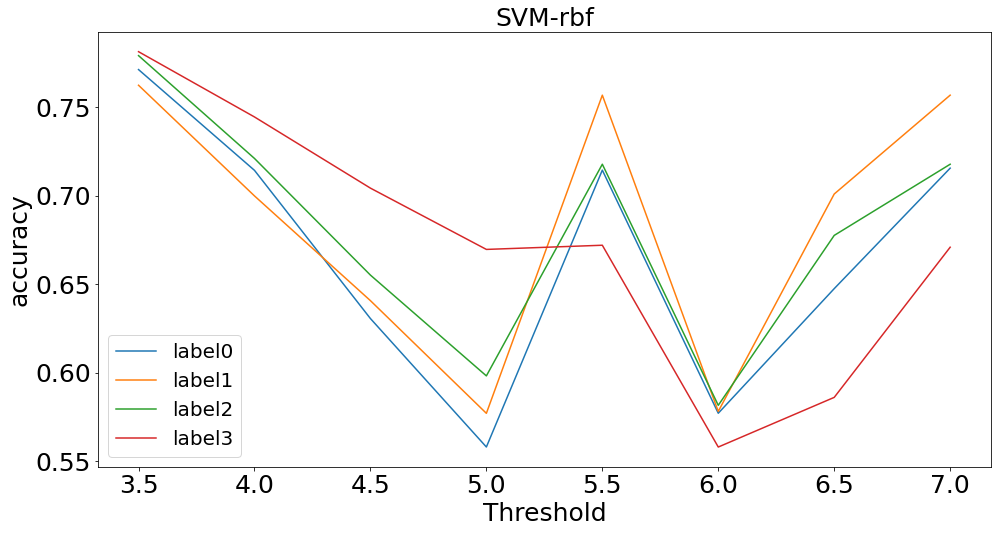

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(thresh_values, results_1_0[0],label='label0')
plt.plot(thresh_values, results_1_1[0],label='label1')
plt.plot(thresh_values, results_1_2[0],label='label2')
plt.plot(thresh_values, results_1_3[0],label='label3')

plt.xlabel('Threshold',fontsize=25)
plt.ylabel('accuracy',fontsize=25)
plt.title('SVM-rbf',fontsize=25)
plt.legend(fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()